<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
C:\Users\PC\AppData\Local\Temp\ipykernel_36000\1051939752.py:16: SyntaxWarning: invalid escape sequence '\d'
  data['rating_int'] = data['rating'].str.extract('(\d)').astype(int)
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


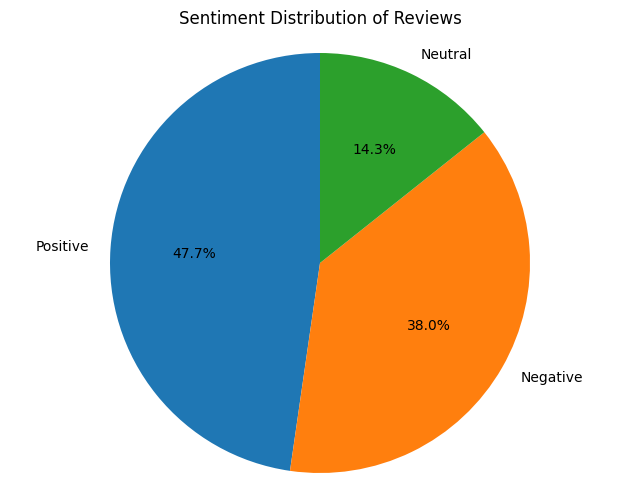

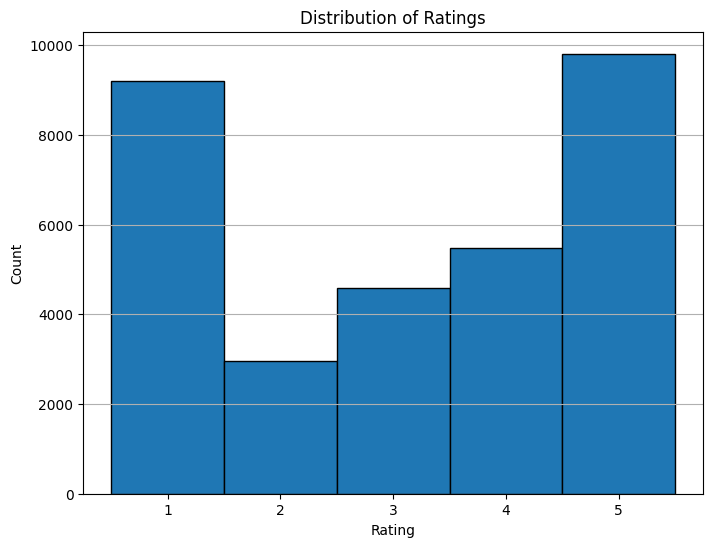

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
import nltk     

file_path = 'C:/Users/PC/OneDrive/Desktop/SQL/Final project/DEPI/Datasets/Origin/store_reviews_with_states.csv'
data = pd.read_csv(file_path)

data.columns = data.columns.str.strip()
data['rating_int'] = data['rating'].str.extract('(\d)').astype(int)

def categorize_rating(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

data['sentiment'] = data['rating_int'].apply(categorize_rating)

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
data['nltk_sentiment'] = data['review'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['nltk_sentiment_category'] = data['nltk_sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

sentiment_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution of Reviews')
plt.axis('equal')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(data['rating_int'], bins=np.arange(0.5, 6.5, 1), edgecolor='black', align='mid')
plt.xticks(range(1, 6))
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

In [ ]:
print(data[['review', 'rating_int', 'sentiment', 'nltk_sentiment', 'nltk_sentiment_category']].head())

In [3]:
data.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,state_abbreviation,state_full_name,rating_int,sentiment,nltk_sentiment,nltk_sentiment_category
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,TX,Texas,1,Negative,0.5215,Positive
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,TX,Texas,4,Positive,0.8687,Positive
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,TX,Texas,1,Negative,-0.3535,Negative
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,TX,Texas,5,Positive,0.0000,Neutral
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,TX,Texas,1,Negative,-0.8020,Negative
